# Explore epsilon vs scale for different datasets using OpenCV Bilateral and Convlution/average filters
- See if chosen optimal parameters vary wrt to epsilon and scale values
<br>
Hypothesis: For Convolution Filter, optimal is 3x3 kernel (usually with denominator k^2-1 if we have sparse data). For Bilateral, optimal is d = 9, s = 70
#### Notes: 
- Using Beijing Taxi dataset, US Taxi dataset, Twitter Check-In dataset
- Epsilon e = 0.1, 0.01
- Scale 10^6, 10^8
#### Findings: 
- The above proposed parameters do tend to produce the best results contingent on the level of noise in the data to begin with. 
- Sets that have abundant data points and lots of noise will work well with using the 3x3 kernel with denominator k^2-1. Those that are more sparse and not very noisy lose too much data when applying such a filter, and the standard 3x3 averaging kernel works better

- A bilateral filter baseline of d = 9 and s = 70 seems to be the best or near best option for all datasets with varying epsilon tested. *** Granted there is a "results-may-vary" factor where data with lower epsilon values that are already very noisy might just not have a good baseline at all using these methods.  


- To-do checklist:
- THESIS: Baseline visualizations vs visual metrics of differing eps, scale paramenters??
- Oral defense
- 20 page thesis draft

In [119]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
dpi = 256

In [106]:
def plotComparison(original, openCV_out, method):
    plt.subplot(121),plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)),plt.title('Base')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv2.cvtColor(openCV_out, cv2.COLOR_BGR2RGB)),plt.title(method)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [107]:
def save_256px(openCV_out, method):
    fig = plt.figure(figsize=(5, 5))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(cv2.cvtColor(openCV_out, cv2.COLOR_BGR2RGB))
    plt.savefig('OpenCV_ep_scale_variations/'+ method + '.png', pad_inches=0, dpi=dpi / 5.0)

# Base Images

# Convolution/Averaging

In [110]:
def runExperimentAveraging(k, d, imageSet):
    orig = imageSet[0][1]
    img = imageSet[1][1]
    nneg = imageSet[2][1]
    
    kernel = np.ones((k,k),np.float32)/(k**d[0]-d[1])
    # Changed divide by kernel^2 (ie. denomiator was 4 -> changed to 3)... this value changes brightness of image??
    dst = cv2.filter2D(img,-1,kernel)
    dstNN = cv2.filter2D(nneg,-1,kernel)

    plotComparison(orig, dst, "Averaged {} k = {} d = {}".format(imageSet[1][0], k, d))
    plotComparison(orig, dstNN, "Averaged {} k = {} d = {}".format(imageSet[2][0], k, d))
    save_256px(dst, '{} k = {} d = {}'.format(imageSet[1][0], k, d))
    save_256px(dstNN, '{} k = {} d = {}'.format(imageSet[2][0], k, d))


# Bilateral

In [108]:
# Beijing Taxi Data
orig_BJ_1e8 = cv2.imread('BeijingTaxiData/in_1E8.png')
eps01_BJ_1e8 = cv2.imread('BeijingTaxiData/out_Identity_1E8_e1E-1.png')
nneg_eps01_BJ_1e8 = cv2.imread('BeijingTaxiData/out_Identity_1E8_e1E-1_nonNeg.png')

BJ_1e8 = [("orig_BJ_1e8", orig_BJ_1e8), ("eps01_BJ_1e8", eps01_BJ_1e8), ("nneg_eps01_BJ_1e8", nneg_eps01_BJ_1e8)]

orig_BJ_1e6 = cv2.imread('BeijingTaxiData/in_1E6.png')
eps01_BJ_1e6 = cv2.imread('BeijingTaxiData/out_Identity_1E6_e1E-1.png')
nneg_eps01_BJ_1e6 = cv2.imread('BeijingTaxiData/out_Identity_1E6_e1E-1_nonNeg.png')

BJ_1e6 = [("orig_BJ_1e6", orig_BJ_1e6), ("eps01_BJ_1e6", eps01_BJ_1e6), ("nneg_eps01_BJ_1e6", nneg_eps01_BJ_1e6)]

# US Taxi Data
orig_US = cv2.imread('USTaxiData/in.png')
eps1_US = cv2.imread('USTaxiData/out_Identity_e1.png')
eps01_US = cv2.imread('USTaxiData/out_Identity_e1E-1.png')

US = [("orig_US", orig_US), ("eps1_US", eps1_US), ("eps01_US", eps01_US)]

# Twitter Data
orig_twitter = cv2.imread('TwitterData/in.png')
eps1_twitter = cv2.imread('TwitterData/out_Identity_e1.png')
eps01_twitter = cv2.imread('TwitterData/out_Identity_e1E-1.png')

TWITTER = [("orig_twitter", orig_twitter), ("eps1_twitter", eps1_twitter), ("eps01_twitter", eps01_twitter)]

In [112]:
def runExperimentBilateral(d, s, imageSet):
    orig = imageSet[0][1]
    img = imageSet[1][1]
    nneg = imageSet[2][1]
    
    bilateral = cv2.bilateralFilter(img,d,s,s)
    bilateralNN = cv2.bilateralFilter(nneg,d,s,s)

    plotComparison(orig, bilateral, "Bilateral {} d = {} s = {}".format(imageSet[1][0], d, s))
    plotComparison(orig, bilateralNN, "Bilateral {} d = {} s = {}".format(imageSet[2][0], d, s))
    save_256px(bilateral, '{} d = {} s = {}'.format(imageSet[1][0], d, s))
    save_256px(bilateralNN, '{} d = {} s = {}'.format(imageSet[2][0], d, s))

# Experiments

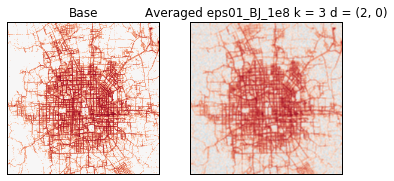

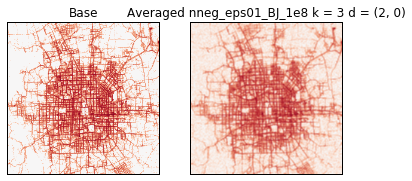

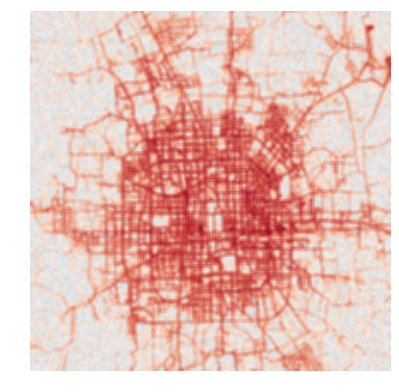

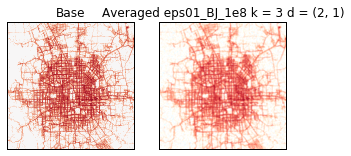

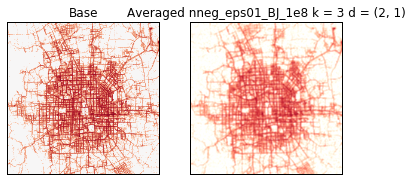

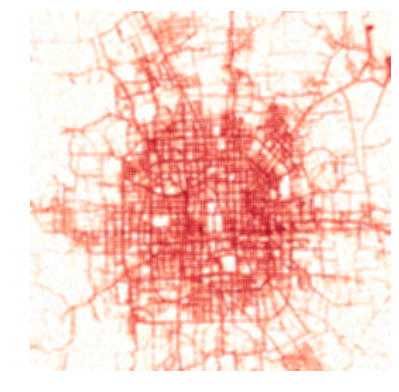

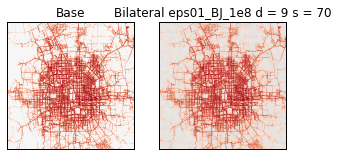

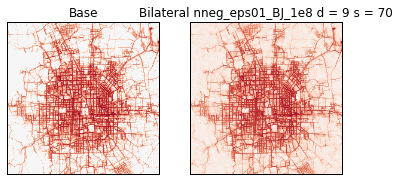

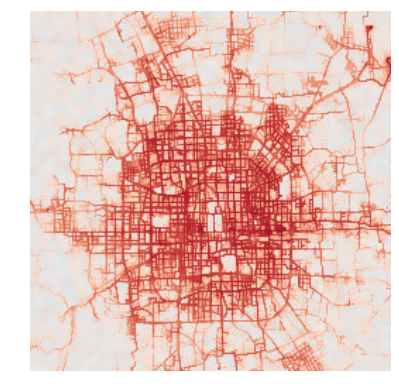

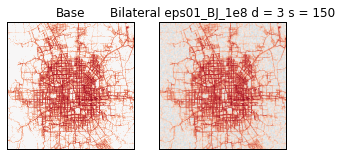

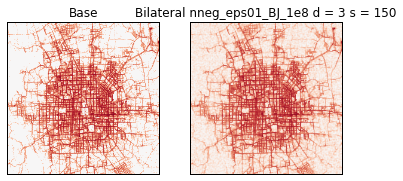

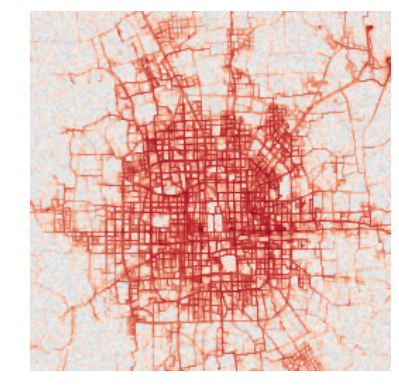

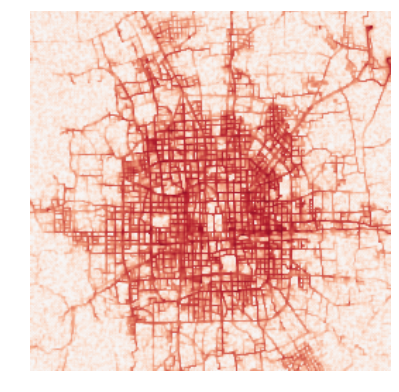

In [113]:
runExperimentAveraging(3, (2, 0), BJ_1e8)
runExperimentAveraging(3, (2, 1), BJ_1e8)
runExperimentBilateral(9, 70, BJ_1e8)
runExperimentBilateral(3, 150, BJ_1e8)

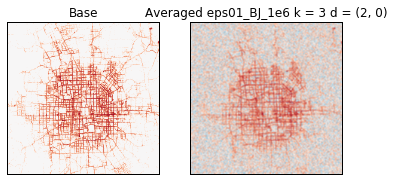

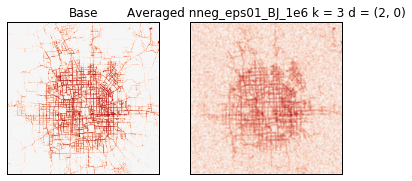

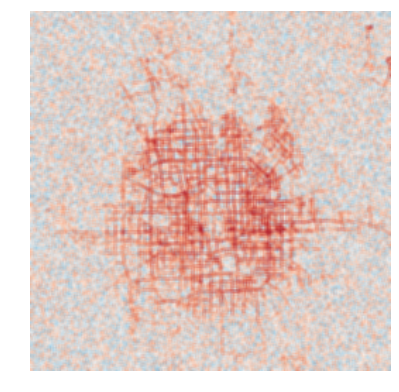

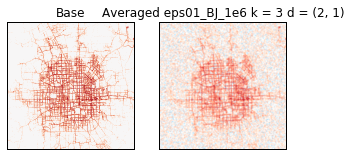

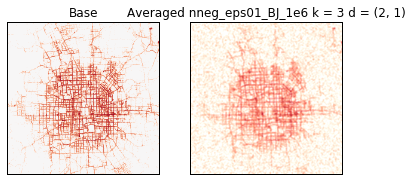

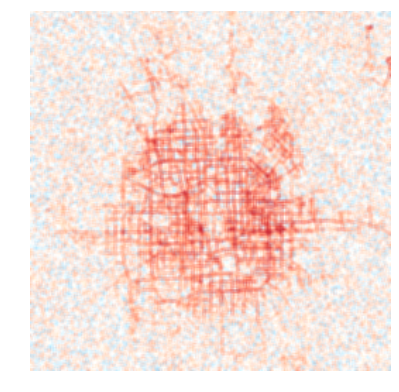

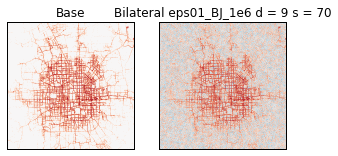

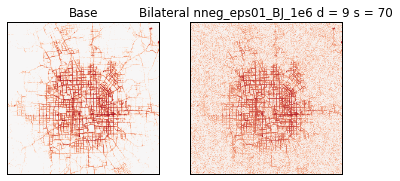

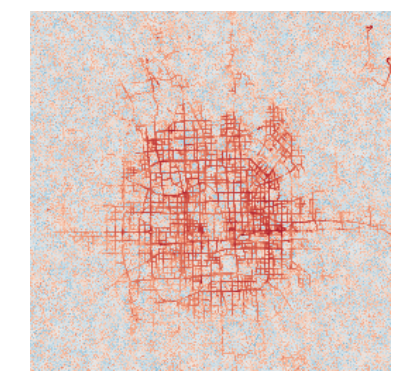

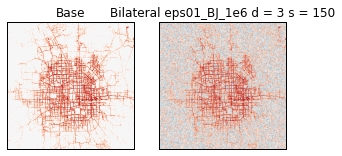

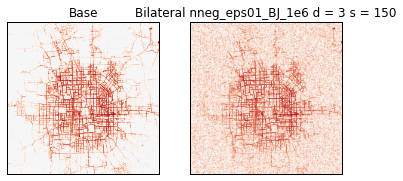

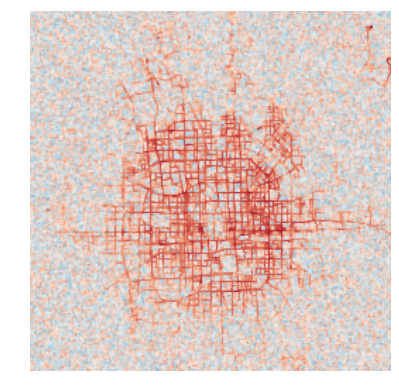

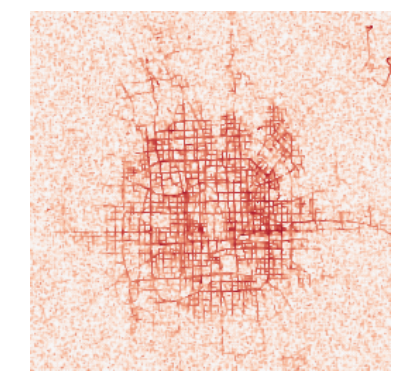

In [114]:
runExperimentAveraging(3, (2, 0), BJ_1e6)
runExperimentAveraging(3, (2, 1), BJ_1e6)
runExperimentBilateral(9, 70, BJ_1e6)
runExperimentBilateral(3, 150, BJ_1e6)

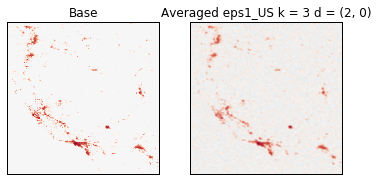

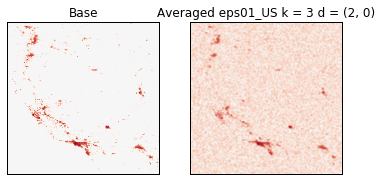

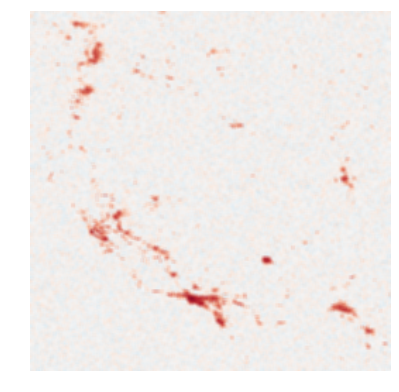

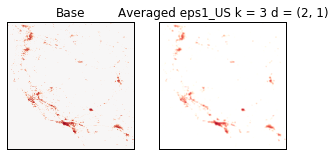

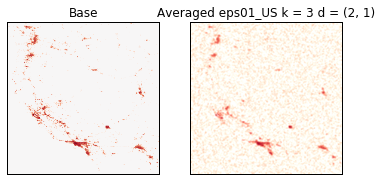

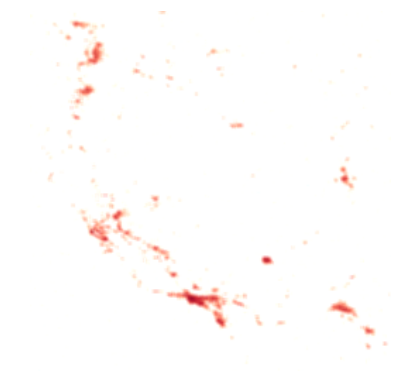

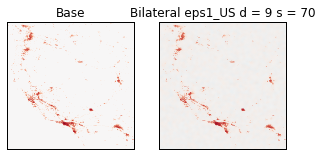

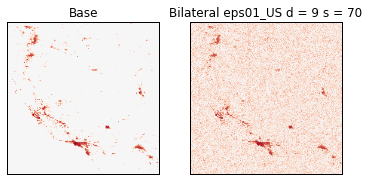

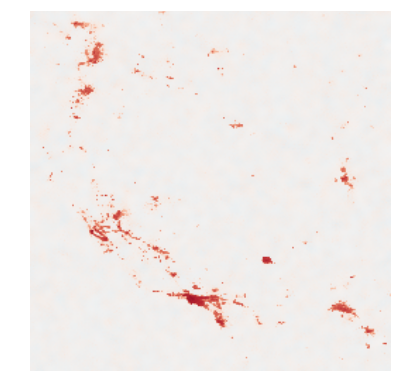

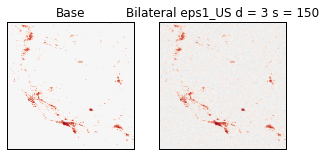

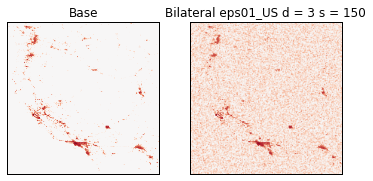

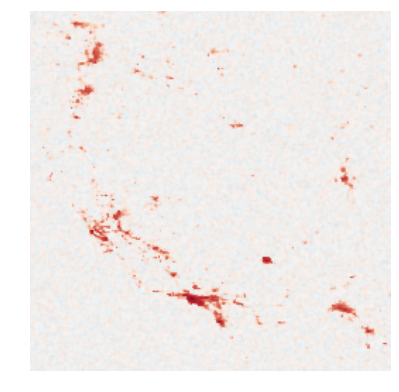

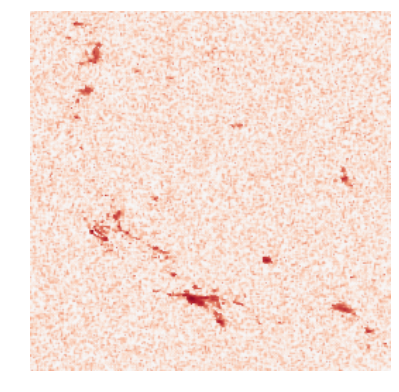

In [115]:
runExperimentAveraging(3, (2, 0), US)
runExperimentAveraging(3, (2, 1), US)
runExperimentBilateral(9, 70, US)
runExperimentBilateral(3, 150, US)

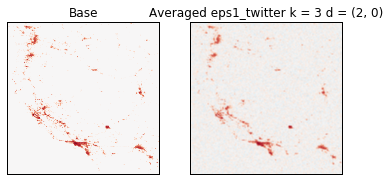

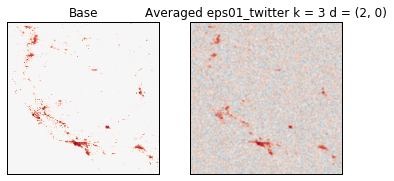

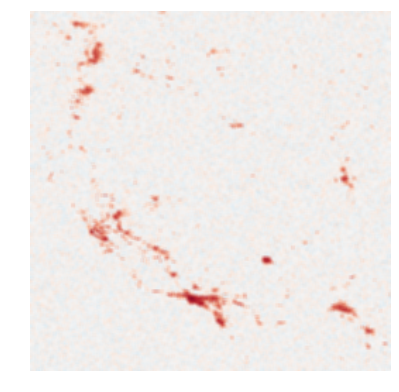

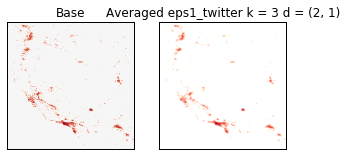

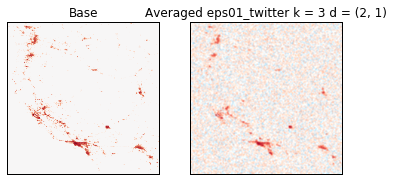

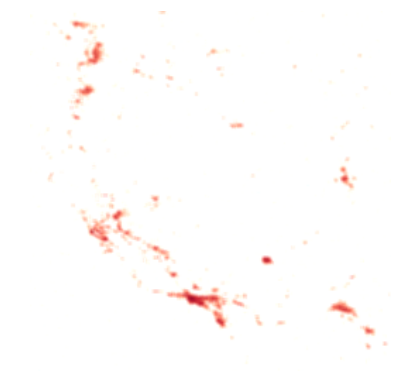

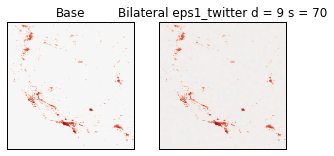

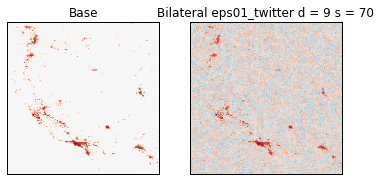

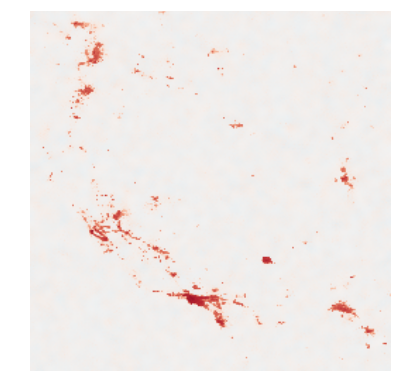

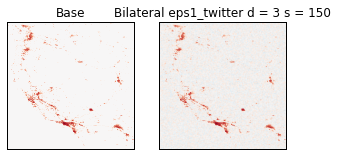

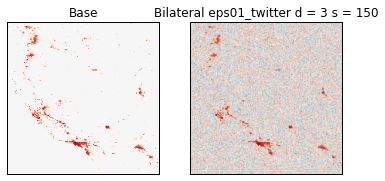

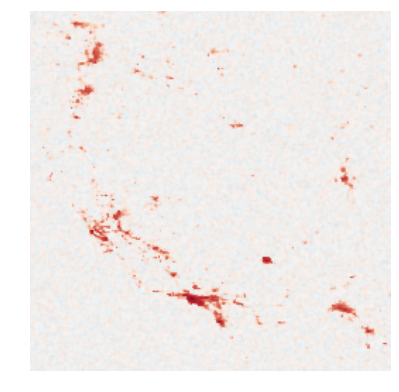

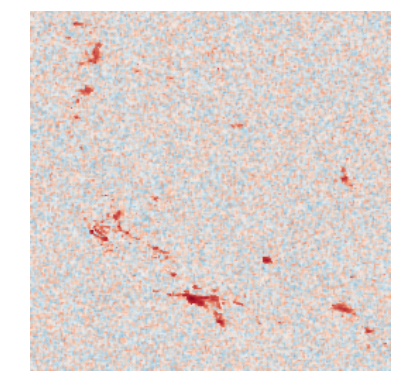

In [116]:
runExperimentAveraging(3, (2, 0), TWITTER)
runExperimentAveraging(3, (2, 1), TWITTER)
runExperimentBilateral(9, 70, TWITTER)
runExperimentBilateral(3, 150, TWITTER)